<a href="https://colab.research.google.com/github/maryam-sabet/Voting_lungCT_Segmentation_With_UNET_DifferentBackbone_Models/blob/main/voting_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**

In [ ]:
import numpy as np
from numpy import argmax
import pandas as pd
import cv2
import glob
import imageio
from google.colab.patches import cv2_imshow
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#**Load UNET Models**

In [ ]:
model_1 = tf.keras.models.load_model("/content/drive/MyDrive/segmentationn/save_model/densenet121.h5", compile=False)

model_2 = tf.keras.models.load_model("/content/drive/MyDrive/segmentationn/save_model/inceptionv3.h5", compile=False)

model_3 = tf.keras.models.load_model("/content/drive/MyDrive/segmentationn/save_model/mobilenetv2.h5", compile=False)


In [ ]:
Data = np.load ("/content/drive/MyDrive/segmentationn/dataset/data.npy")
Mask = np.load ("/content/drive/MyDrive/segmentationn/dataset/mask.npy")


In [ ]:
Data=Data.astype("float32")
Mask=Mask.astype("float32")

#Normalization
Mask=Mask/255


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Data, Mask, test_size=0.2, random_state=42)


In [ ]:
# Perform predictions using loaded models
prediction1=model_1.predict(X_test)
prediction2=model_2.predict(X_test)
prediction3=model_3.predict(X_test)

11/11 [==============================] - 68s 6s/step


In [ ]:
print(prediction1.shape , prediction2.shape , prediction3.shape ,y_test.shape )

(332, 224, 224, 1) (332, 224, 224, 1) (332, 224, 224, 1) (332, 224, 224, 3)


In [ ]:
# Squeeze predictions
prediction1 = prediction1.squeeze()
prediction2 = prediction2.squeeze()
prediction3 = prediction3.squeeze()

In [ ]:
print(prediction1.shape , prediction2.shape , prediction3.shape ,y_test.shape )

(332, 224, 224) (332, 224, 224) (332, 224, 224) (332, 224, 224, 3)


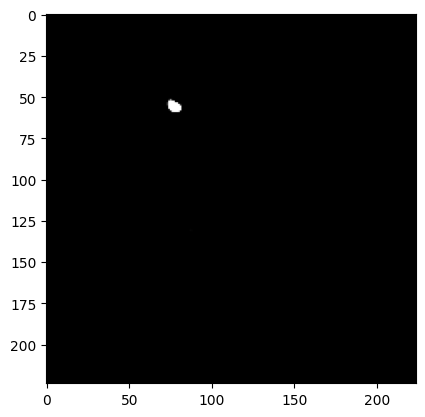

In [ ]:
# Display a sample prediction
plt.imshow(prediction1[10] ,"gray")

In [ ]:
# Create a list to hold the predictions
model=[]
model.append(prediction1.round())
model.append(prediction2.round())
model.append(prediction3.round())

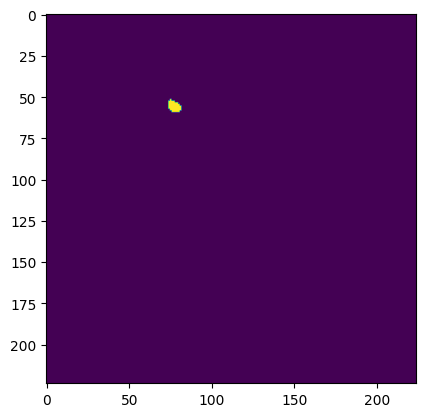

In [ ]:
plt.imshow(model[0][10])

In [ ]:
# Display unique values in a sample prediction
np.unique(model[0][10], return_counts=True)

(array([0., 1.], dtype=float32), array([50130,    46]))

#**Voting algorithm for Segmentation**

In [ ]:
d=[]
f=[]
image = np.zeros((224,224))
for x in range(len(y_test)):
  for i in range(0,224):
    for j in range(0,224):
      for m in range(len(model)):
        if (model[m][x][i,j]==0):
          # print("******************")
          f.append(0)
        if (model[m][x][i,j]==1):
          # print("//////////////////")
          f.append(1)
      if f.count(0)>f.count(1):
        image[i,j]=0
      else:
        image[i,j]=1
      f=[]

  d.append(image)


In [ ]:
# Display the shape of the segmentation result
d[0].shape

(224, 224)

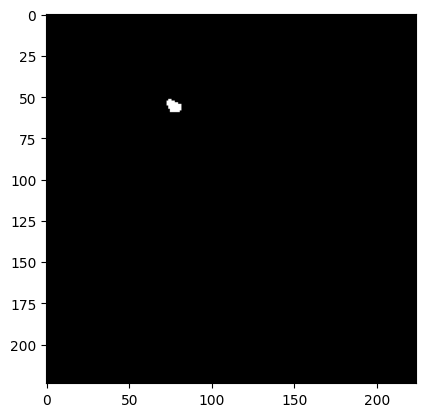

In [ ]:
# Display a sample segmentation result
plt.imshow(d[0], "gray")

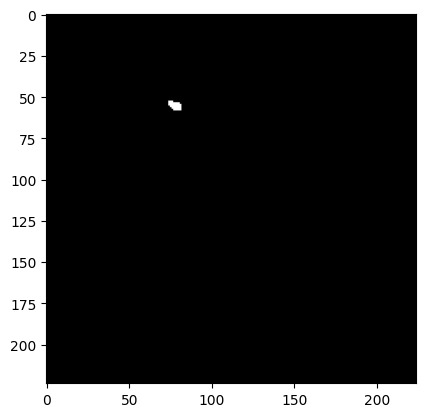

In [ ]:
plt.imshow(y_test[10])

In [ ]:
image = np.zeros((y_test.shape[1],y_test.shape[2],3))
image.shape

(224, 224, 3)